##**Part** 1: Definition and  Derivation of the Pseudo-Inverse
Create a Text Cell in your Colab notebook (Markdown cell) and include the following content (or your own variation). You may use the following
LaTeX

 snippet as a guide.
$$ \textbf{Definition (Moore–Penrose Pseudo-Inverse):} $$
$$ {Given a matrix } A \in \mathbb{R}^{m \times n} \text{ with rank } r,\,
 {the Moore–Penrose pseudo-inverse of } A \text{ is the unique } n \times m
 { matrix } A^{\dagger} \text{ satisfying the following conditions:}
$$

$$
1. A A^{\dagger} A = A,\\
2. A^{\dagger} A A^{\dagger} = A^{\dagger},\\
3. (A A^{\dagger})^T = A A^{\dagger},\\
4. (A^{\dagger} A)^T = A^{\dagger} A.
$$

$$
\textbf{Derivation (One Possible Approach):}\\
\text{If } A \text{ has full column rank (}m \ge n\text{ and rank}(A)=n\text{), the pseudo-inverse can be computed as:}\\
A^{\dagger} = (A^T A)^{-1} A^T. \\
\text{More generally, if } A \text{ is not necessarily full-rank, one may use singular value decomposition (SVD):}\\
A = U \Sigma V^T, \\
A^{\dagger} = V \Sigma^{\dagger} U^T, \\
\text{where } \Sigma^{\dagger} \text{ is obtained by taking the reciprocal of the non-zero singular values in } \Sigma
\text{ (and transposing the matrix).}
$$



### **Part 2: Generate Random Linear Data with Noise**

$$
\begin{aligned}
&\textbf{Step 2: Generate Random Linear Data with Noise}\\[6pt]
&2.\,\text{Generate synthetic linear data } y = a \cdot x + b \text{ with some noise.}\\
&3.\,\text{Store the features in a design matrix } X \text{ so that each row is } [1, x_i].
\end{aligned}
$$

**Template Code for Generating Random Linear Data**

```python
import numpy as np
import matplotlib.pyplot as plt

# 1. Set a seed for reproducibility or remove this line for truly random results
np.random.seed(<YOUR_SEED>)

# 2. Choose the number of data points
N = <NUMBER_OF_DATA_POINTS>

# 3. Define the "true" slope (a_true) and intercept (b_true)
a_true = <YOUR_SLOPE>     # e.g., 2.0
b_true = <YOUR_INTERCEPT> # e.g., 3.0

# 4. Generate random x-values in some range
#    You can change -5, 5 to another range if you wish
x_min, x_max = <X_MIN>, <X_MAX>  # e.g., -5, 5
x = np.random.uniform(x_min, x_max, N)

# 5. Generate noise (mean=0, std=<YOUR_STD>)
noise_std = <NOISE_STD>   # e.g., 2
noise = np.random.normal(0, noise_std, N)

# 6. Create the y-values from the line y = a_true*x + b_true + noise
y = a_true * x + b_true + noise

# 7. Build the design matrix X
#    Column 1 = 1 (intercept), Column 2 = x-values
X = np.column_stack((np.ones(N), x))

# Optional: Print some sample values to verify
print("First 5 rows of X:")
print(X[:5])
print("\nFirst 5 values of y:")
print(y[:5])


First 5 rows of X:
[[ 1.         -1.25459881]
 [ 1.          4.50714306]
 [ 1.          2.31993942]
 [ 1.          0.98658484]
 [ 1.         -3.4398136 ]]

First 5 values of y:
[ 0.66489651 11.41627143  7.82340039  0.99803185 -4.31897097]


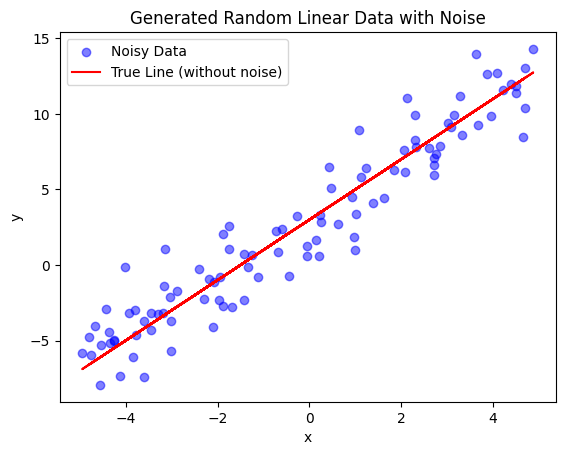

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Set a seed for reproducibility
np.random.seed(42)

# 2. Choose the number of data points
N = 100

# 3. Define the "true" slope (a_true) and intercept (b_true)
a_true = 2.0
b_true = 3.0

# 4. Generate random x-values within a specified range
x_min, x_max = -5, 5
x = np.random.uniform(x_min, x_max, N)

# 5. Generate noise with a given standard deviation
noise_std = 2.0
noise = np.random.normal(0, noise_std, N)

# 6. Create the y-values using the equation y = a_true * x + b_true + noise
y = a_true * x + b_true + noise

# 7. Build the design matrix X
#    Column 1 = 1 (intercept term), Column 2 = x-values
X = np.column_stack((np.ones(N), x))

# Optional: Print some sample values to verify
print("First 5 rows of X:")
print(X[:5])
print("\nFirst 5 values of y:")
print(y[:5])

# 8. Plot the generated data
plt.scatter(x, y, label="Noisy Data", color="blue", alpha=0.5)
plt.plot(x, a_true * x + b_true, label="True Line (without noise)", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Random Linear Data with Noise")
plt.legend()
plt.show()


## Part 3: Calculating the Pseudo-Inverse and Plotting the Result

In this section, you will:
- Use the design matrix \(X\) and the observed data \(y\) to compute estimated parameters via the pseudo-inverse.
- Plot your fitted line alongside the original data.

Recall that the Moore–Penrose pseudo-inverse of \(X\) is computed by:

$$
\begin{aligned}
    X^\dagger &= \mathrm{pinv}(X),\\
    \hat{\beta} &= X^\dagger \, y.
\end{aligned}
$$

Once you obtain $\hat{\beta}$, generate a range of $x$-values, compute the corresponding $\hat{y}$-values using your fitted model, and overlay this line on a scatter plot of the original data.

.


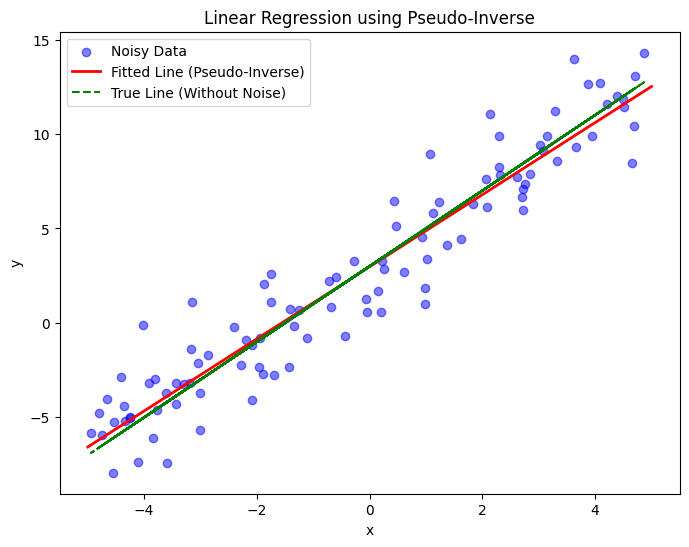

Estimated Intercept (b): 2.9704
Estimated Slope (a): 1.9080


In [ ]:
# 1. Compute the pseudo-inverse of X
X_pinv = np.linalg.pinv(X)

# 2. Estimate parameters (intercept and slope)
beta_hat = X_pinv @ y
b_est, a_est = beta_hat

# 3. Prepare a range of x-values for plotting the fitted line
x_fit = np.linspace(x_min, x_max, 100)
y_fit = a_est * x_fit + b_est

# 4. Plot the original data and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Noisy Data", color="blue", alpha=0.5)
plt.plot(x_fit, y_fit, label="Fitted Line (Pseudo-Inverse)", color="red", linewidth=2)
plt.plot(x, a_true * x + b_true, label="True Line (Without Noise)", color="green", linestyle="dashed")

# 5. Label and show the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using Pseudo-Inverse")
plt.legend()
plt.show()

# Print estimated parameters
print(f"Estimated Intercept (b): {b_est:.4f}")
print(f"Estimated Slope (a): {a_est:.4f}")